In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [15]:
filename = 'df1.pickle'

with open(filename, 'rb') as f:
    data = pickle.load(f)

In [16]:
data

{'rho': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'stim': array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625])}

In [19]:
data["rho"], data["stim"]

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625]))

In [51]:
print("average stimulus velocity: ", data["stim"].mean())
print("total number of spikes: ", data["rho"].sum())
print("total number of observations: ", data["rho"].size)

average stimulus velocity:  -0.094288297526
total number of spikes:  53601
total number of observations:  600000


In [205]:
np.array(data["rho"][22:25])

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [231]:
len(data["rho"][150:].nonzero()[0])

53583

In [234]:
def graph_sta(interval):
    index = np.random.randint(102,600000)
    print("The time interval shown is between: ",index-interval,"&", index)
    stimulus = np.array(data["stim"][index-interval:index])
    
    spike = np.array(data["rho"][index-interval:index])
    spike_index = spike.nonzero()[0]
    print("There were ", len(spike_index), "spikes in this time interval")
    
    x = np.array(range(0,interval))
    
    plt.plot(x, stimulus, color = 'g')
    for xc in spike_index:
        plt.axvline(x=xc, color = 'r')
    plt.xlabel("Arbitrary Time Period")
    plt.show()
    
    return

SyntaxError: invalid syntax (<ipython-input-234-31bcbf7604e2>, line 18)

In [237]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

The time interval shown is between:  295196 & 295296
There were  21 spikes in this time interval


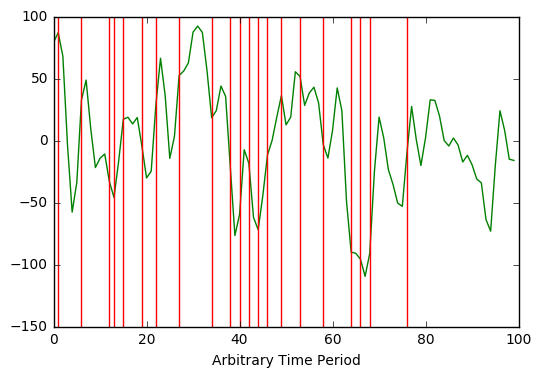

hi


In [270]:
graph_sta(100)

In [277]:
def compute_sta(num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    rho = data["rho"]
    stim = data["stim"]
    sta = np.zeros((num_timesteps,))
    
    # Get indices of all the spikes that occur after 300ms into the recording
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    
    num_spikes = len(rho[num_timesteps:].nonzero()[0])
    
    # Compute the spike-triggered average of the spikes found
    
    
    
    for i in range(1,num_spikes):
        start_index = spike_times[i]
        print(sta)
        for j in range(1,num_timesteps):
            sta[-j] += stim[spike_times[i]-j]
            
    for i in range(1,num_timesteps):
        sta[i] = sta[i]/num_timesteps
            
    x = np.array(range(0,num_timesteps))
    plt.plot(x, sta)
    plt.show()
        
    
    
    return spike_times, num_spikes


In [ ]:
compute_sta(150)

[   158    160    162 ..., 599936 599941 599947]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[   0.           -8.61816406   35.06347656   55.92285156   46.72851562
   53.75976562   96.84082031  121.67480469  109.58984375   71.92871094
   16.76757812   17.95898438   63.7890625    90.24902344  103.49121094
   76.31347656   35.65429688   58.61816406   68.05175781   44.30664062
   38.52539062    5.36621094  -24.78027344  -17.12890625 

In [251]:
sup = np.array([1,2,3,4])
sup

array([1, 2, 3, 4])

In [264]:
sup[-3]

2